# Básico de Pandas

In [3]:
import pandas as pd

In [4]:
notes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
# Número de linhas e colunas
notes.shape

(100836, 4)

In [5]:
notes.columns = ["usuarioId", "filmeId", "nota", "momento"]
notes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Buscando os valores únicos possíveis para notas
notes["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
# Buscando quantas vezes cada nota aparece
quantidade_nota = notes["nota"].value_counts()
print(quantidade_nota)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64


# Percepção cientista:
  A tendência de notas quebrada é baixíssima como demonstrado no cálculo abaixo, elas demonstram apenas ___% das notas.


In [8]:
soma_quantia_quebrada = quantidade_nota[3.5] + quantidade_nota[4.5] + quantidade_nota[2.5] + quantidade_nota[1.5] + quantidade_nota[0.5]
calculo = (soma_quantia_quebrada / notes.shape[0]) * 100
f"Porcentagem de notas quebradas no total de notas: {calculo.round()}%"

'Porcentagem de notas quebradas no total de notas: 30.0%'

Por que do gráfico?
Quando queremos especificidade, vamos a tabela, números quebrados e precisos, o gráfico nos garantes a ludicidade, ver diferenças grandes de forma mais fácil e menos precisa.

<Axes: ylabel='Frequency'>

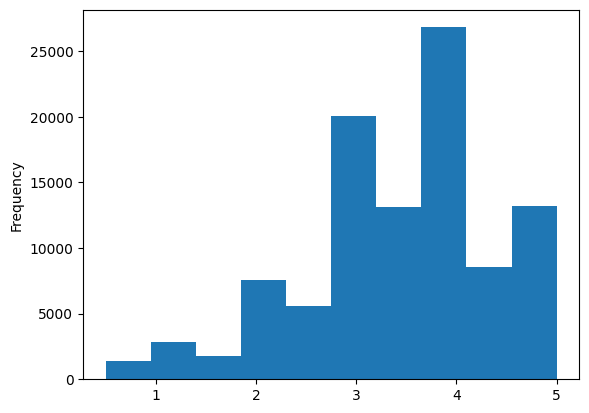

In [9]:
# Histograma é feito justamente para contagem histórica de algo, como para um value_counts
notes["nota"].plot(kind='hist')

In [10]:
# Como perceber o crescimento nas notas da tabela? Verificando o calculo de porcentagem, vemos que números quebrados já não são comuns
# porém, numeros abaixo de 3, vendo o gráfico, também não. Vamos verificar de forma mais calculada.... :
soma_ate_nota_3 = 0
processador = 0.5
while processador <= 3:
  soma_ate_nota_3 += quantidade_nota[processador]
  processador += 0.5
calculo = (soma_ate_nota_3 / notes.shape[0]) * 100
f"Porcentagem de notas até 3 para o total: {calculo.round()}"

'Porcentagem de notas até 3 para o total: 39.0'

Assim conseguimos imaginar uma linha de crescimento massiva após a nota 3, onde podemos ver uma tendência de notas grandes.

In [11]:
# Para termos uma descrição da distribuição dos valores podemos usar:
notes["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Para termos uma melhor ideia da distribuição e da tendência de notas maiores (mas não perfeitas), podemos usar um boxplot, onde a barra horizontal demonstra a média, os quadrados azul, cada um cortado pela barra, 25% do total, ou seja. A parte azul se refere a 50% das notas (ou dados), o restante da linha são  os 25% restantes, e os pontos "soltos" são notas raras.

<Axes: ylabel='nota'>

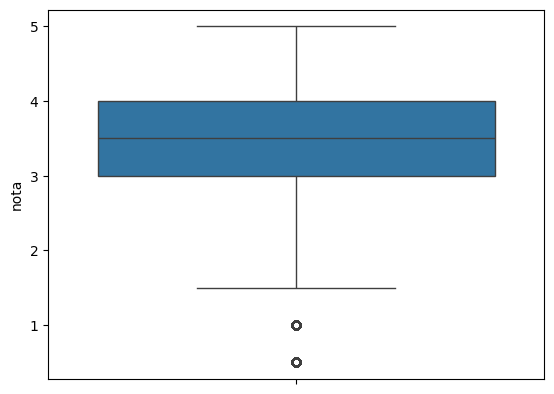

In [12]:
import seaborn as sns

sns.boxplot(notes["nota"])

# Análise exploratória

Agora vamos fazer uma análise exploratória dos dados, isso é, retirar conhecimento válido (e de forma mais objetiva) dos nossos dados, explorando e limpando eles.

In [15]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv")
filmes.columns = ["filmeId", "titulo", "gêneros"]
filmes.head()

,filmeId,titulo,gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
# Buscando notas de determinado filme id (pandas facilita muito
# a coluna numa query se torna uma série (uma sequencia não listada de dados, como um array bidimensional)
media_toy_story = notes.query("filmeId==1").nota.mean()
"Média de notas para Toy Story: {:.2f}".format(media_toy_story)

'Média de notas para Toy Story: 3.92'

In [30]:
# O groupby agrupa todos valores de determinada coluna e coloca eles em posição de por exemplo, calcularmos a média
medias_por_filme = notes.groupby("filmeId").nota.mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Agora podemos querer saber a distribuição histórica das *médias* por filme, de forma diferente do nosso histórico de notas gerais

<Axes: ylabel='Frequency'>

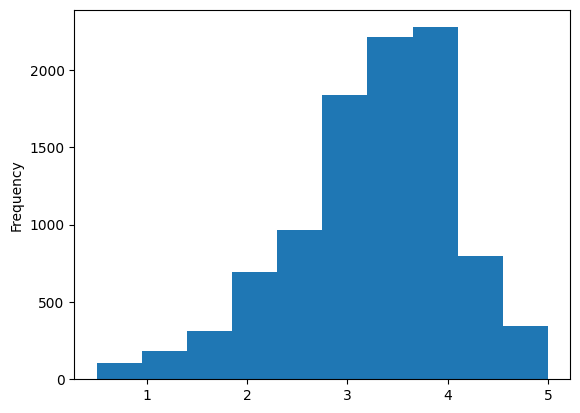

In [31]:
medias_por_filme.plot(kind="hist")

Novamente fica claro algumas questões de como o crescimento apartir de 3 é visível, podemos também usar outras ferramentas para trabalhar com isso, vamos la...

<Axes: ylabel='nota'>

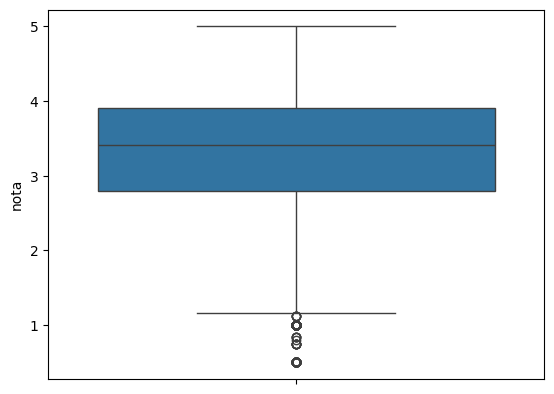

In [32]:
# Usando boxplot do Seaborn
sns.boxplot(medias_por_filme)

<Axes: xlabel='nota', ylabel='Count'>

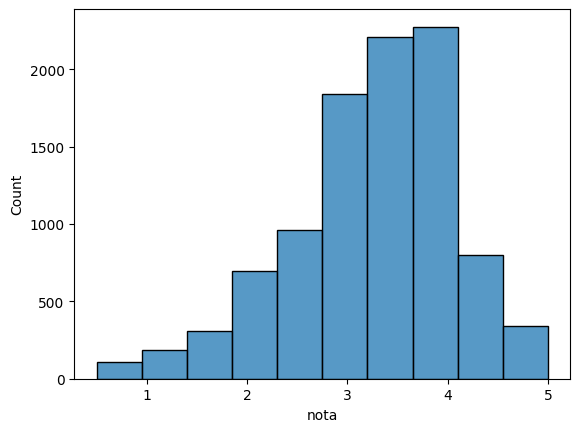

In [41]:
# Temos também como verificar o crescimento das médias de nota com o seaborn com o histograma dele (distplot)
# podemos escolher a quantidade de bins (seções) para o hstograma
sns.histplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das médias por filme')

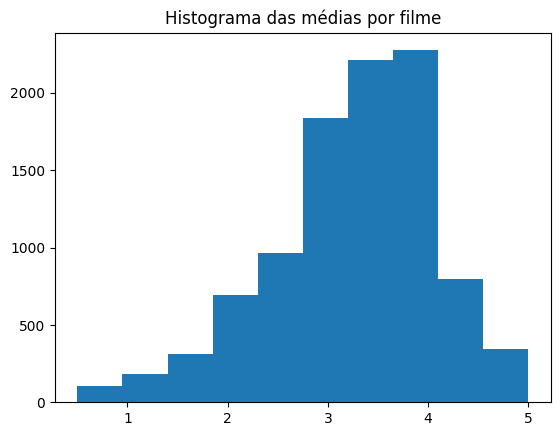

In [44]:
import matplotlib.pyplot as plt

# Utilizando o histograma da plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias por filme")

### Entendendo um pouco sobre variáveis.

Temos os conjuntos de dados em série (colunas), que podem ser classificados como: 

**Categóricos Nominal**, eles não tem ordem e demonstram apenas nomes ou dados descritivos

**Categóricos Ordinal**, eles demonstram uma ordem descritiva, ex: 1º grau -> 2º grau -> 3º grau
porém ela não pode ser somada, ela demonstra uma ordem apenas.

**Quantitativo ou budget contínuo**, são os quantitativos que possuem continuinadade de soma, por exemplo: 0.1, 0.2, 02, 0.3, 0,5. , como coluna de orçamentos por exemplo, nem todos são iguais, nem segue padrão, porém pode se tirar média, somar e ver continuidade (menor para maior)

**Quantitativo ou budget intervalar**, são quantitativos intervalados, como com apenas números inteiros, seguindo um padrão de crescimento ou decrescimento.

# Trabalhando com visualização de dados

In [60]:
tbmdb = pd.read_csv("https://raw.githubusercontent.com/CTopham/TophamRepo/master/Movie%20Project/Resources/tmdb_5000_movies.csv")
tbmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [71]:
# Visualizando quantas vezes cada linguagem aparece
# lembrando que isso é originalmente uma série, para tornarmos em um data frame melhor trabalhavel temos que converter
# o reset_index torna o que era index em uma coluna
linguas = tbmdb["original_language"].value_counts().to_frame().reset_index()
linguas.columns = ["Língua original", "Quantia de filmes com a língua"]
linguas.head()

,Língua original,Quantia de filmes com a língua
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='Língua original', ylabel='Quantia de filmes com a língua'>

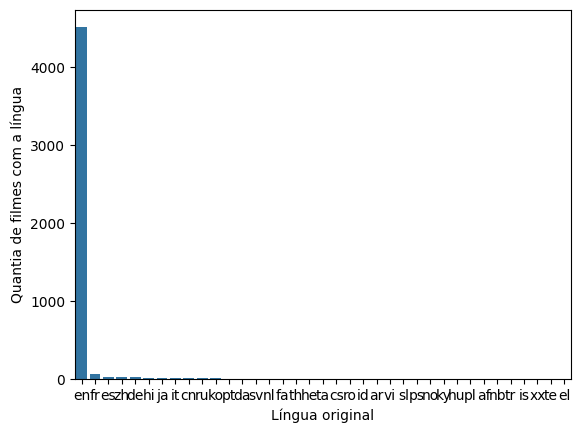

In [73]:
# Fazendo uma plotagem para dados categóricos, lembrando que podemos pesquisar pelo tipo de dados e achar a plotagem específica
# um bom plot para dados categóricos é o de barra
sns.barplot(x="Língua original", y="Quantia de filmes com a língua", data=linguas)

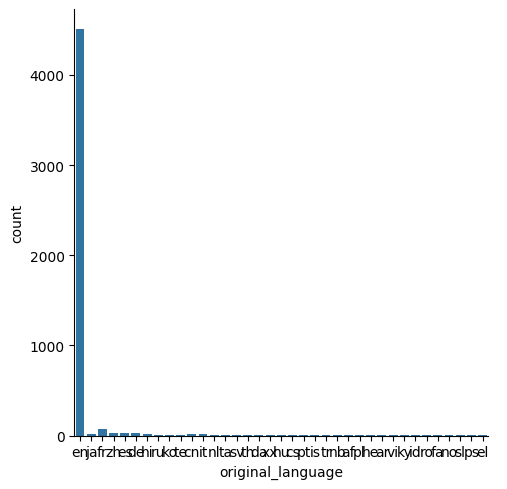

In [75]:
# Se não quisermos efetuar todo esse tratamento, podemos usar a coluna original em um plot de alto nível (mais generalizado)
# como o catplot (plot para dado categórico), temos vários kinds, um deles é para contar o x
sns.catplot(x = "original_language", kind="count", data = tbmdb)

([<matplotlib.patches.Wedge at 0x756a9e7dbfa0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

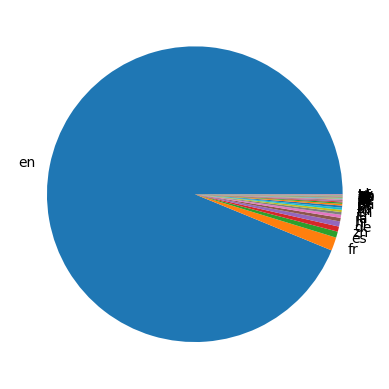

In [78]:
# PiePlot usamos o matplotlib.pyplot
plt.pie(linguas["Quantia de filmes com a língua"],labels=linguas["Língua original"])

Como dito, ficou horrível.
Temos que pensar ao escolher, qual mensagem vai ser passada, o que vamos utilizar para demonstrar o que queremos demonstrar,
nesse caso é a diferença absurda entre inglês e as outras línguas...
Então na verdade queremos comparar inglês com cada uma das outras.

In [82]:
total_por_lingua = tbmdb["original_language"].value_counts()
total_en = total_por_lingua["en"]
total_todas_menos_en = total_por_lingua.sum() - total_en
print(total_todas_menos_en, total_en)

298 4505


In [86]:
# Gerar um df
dados = {
    'lingua': ['inglês', 'outros'],
    'total': [total_en, total_todas_menos_en]
}
df_linguas = pd.DataFrame(dados)

<Axes: xlabel='lingua', ylabel='total'>

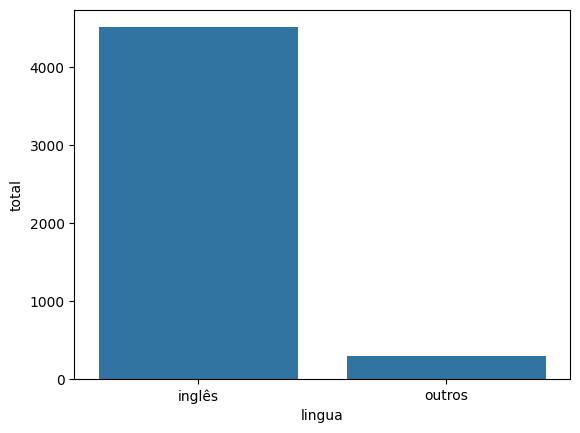

In [89]:
sns.barplot(df_linguas, x='lingua', y='total')

# E assim temos uma visualização muito mais inteligente e melhor!

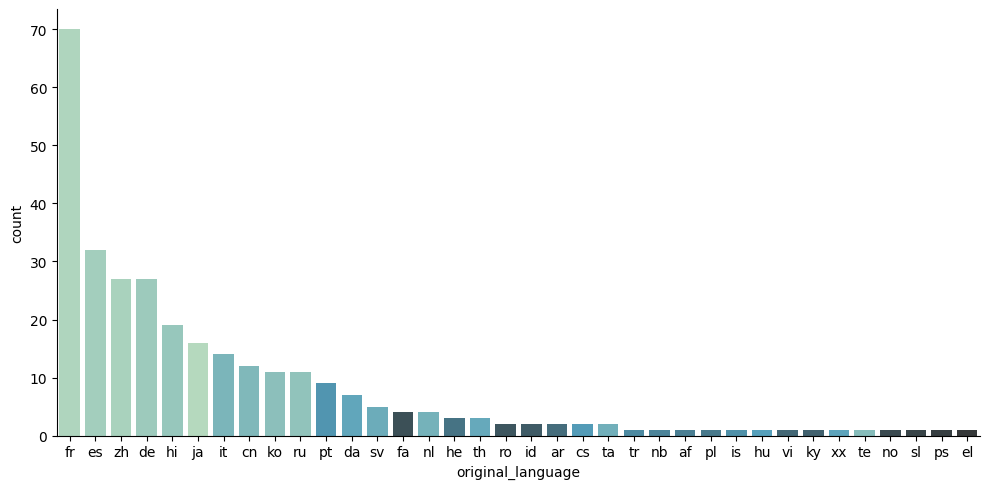

In [102]:
# Agora vamos entender mais sobre as outras línguas
outras_linguas = tbmdb.query("original_language != 'en'")

# Como é um dado categórigo vamos facilitar nossa vida
# Temos que setar um aspecto maior para melhor visualização
# e entender como organizar os dados, seja por ordem (caso tenha) ou outras maneiras (mais aparente - menos aparente)
# e as cores e como podemos verificar apenas por ela o crescimento ou descrecimento (pesquisar pallete no seaborn doc)
sns.catplot(x='original_language', kind='count', data=outras_linguas, aspect=2,
            palette='GnBu_d', hue='original_language', legend=False,
            order=outras_linguas.original_language.value_counts().index)

# Estatística

In [108]:
filmes.head(2)

,filmeId,titulo,gêneros
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [111]:
notas_jumanji = notes.query("filmeId==2")
notas_toy_story = notes.query("filmeId==1")

In [117]:
# Média
print(f"Nota média Toy Story: {round(notas_toy_story.nota.mean(),2)}")
print(f"Nota média Jumanji: {round(notas_jumanji.nota.mean(),2)}")

Nota média Toy Story: 3.92
Nota média Jumanji: 3.43


In [118]:
# Mediana
print(f"Nota média Toy Story: {round(notas_toy_story.nota.median(),2)}")
print(f"Nota média Jumanji: {round(notas_jumanji.nota.median(),2)}")

Nota média Toy Story: 4.0
Nota média Jumanji: 3.5


Temos que pensar o seguinte, pegamos inúmeros dados e usamos eles para focar apenas num ponto, como a média e a mediana. Existem muitas técnicas estatísticas e matemáticas para usar inúmeros dados de formas diferentes, e não focalidazadas. As vezes ok, é necessário a média ou a mediana, porém temos que pensar também em dispersão, em por exemplo, se os extremos são maiores que o a mediana (logo seria um filme opinativo?) então isso tudo tem que ser levado em conta. (e não é usando apenas um dado)

In [123]:
import numpy as np

# Para entendermos melhor, vamos setar um array inteligente, do numpy, que se repete 10 vezes.
filme1 = np.append(np.array([2.5] * 10) , np.array([3.5] * 10))
filme2 = np.append(np.array([1] * 10), np.array([5] * 10))

In [127]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


O que fica perceptível? O filme 2 tem 10 notas 1 e 10 notas 5, um filme de extremos, altamente opinativo. O filme 1 é mais sólido, um filme mediano para ambito geral, mediano pra ruim e mediano pra bom. E ambos, mesmo sendo completamente distintos, são dados como iguais perante média e mediana.

Text(0.5, 1.0, 'Dispersão de notas')

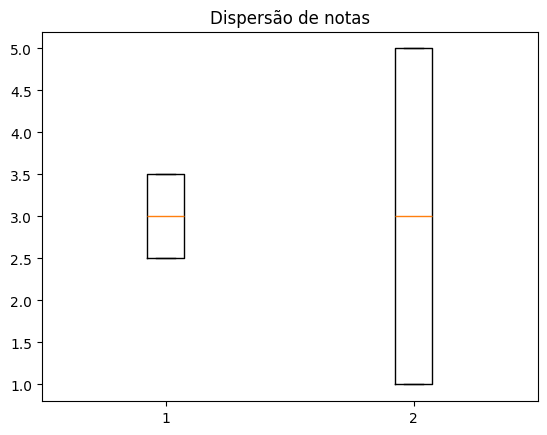

In [131]:
# Podemos entender melhor a diferença de disperção com um boxplot do matplotlib
plt.boxplot([filme1, filme2])
plt.title("Dispersão de notas")

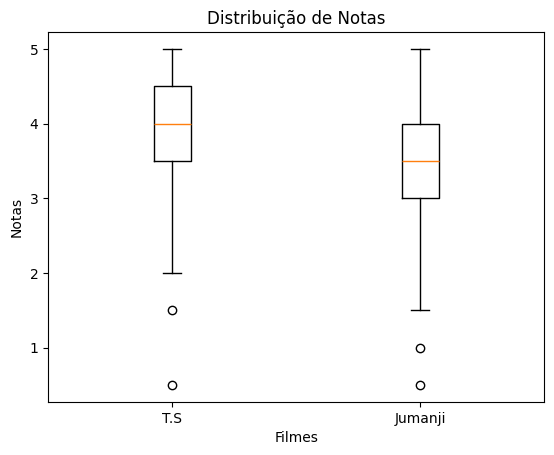

In [140]:
# Agora voltando ao toy story e jumanji...
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota], labels=["T.S", "Jumanji"])

plt.title("Distribuição de Notas")
plt.xlabel("Filmes")
plt.ylabel("Notas")
plt.show()

Podemos verificar assim a diferença de distribuição entre os filmes, onde ambos estão com pouca dispersão, demonstrando solidez, e maior qualidade técnica em T.S.

In [156]:
# Calcular desvio padrão, a dispersão

print("Desvio padrão Jumanji: " + str(round(notas_jumanji.nota.std(), 2)))
print("Desvio padrão Toy Story: " + str(round(notas_toy_story.nota.std(),2 )))

Desvio padrão Jumanji: 0.88
Desvio padrão Toy Story: 0.83
